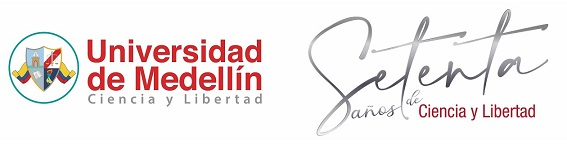
# Taller de análisis de datos - *Jose Alexander Ríos Trespalacios*

Los siguientes ejercicios corresponden al taller de análisis de datos. Estos ejercicios deben ser realizados en los mismos grupos (individuales o en parejas) en los que se entregó la tarea de clase que hace parte de este taller. 

# a. Análisis exploratorio de datos (50%):


###  **1.	Proceso estándar entre industrias para la minería de datos**

• **Entendimiento de Negocios**
¿Qué atributos incrementan o decrementan el valor final de la propiedad a comprar?
¿Por qué el área total de la vivienda está altamente relacionada con su valor final?
¿El precio final de la vivienda está relacionado con el número de habitaciones o la cantidad de baños?
¿El sector donde se encuentra la vivienda puede decirnos (no en valores exactos) que tan costosa puede ser la vivienda?

  • Objetivos: 

  • Riesgos: Algunos atributos pueden presentar problemas a la hora de predecir el precio, por ejemplo, el área en pies cuadrados no siempre se muestra como un valor absoluto, hay 248 datos que muestra este registro en un rango. Para tal caso, solo podemos tomar el promedio del valor mínimo y máximo en el rango. 

• **Comprensión de datos y preparación de datos**

Hay ciertos atributos que se relacionan directamente con el precio final de vivienda (siendo el área en pies cuadrados la más relevante, aunque tienen cierta dependencia entre ellas, una vivienda puede ser grande y estar ubicada en un sector poco valorizado), el precio puede reducirse o aumentarse en consecuencia. Algunos datos contienen valores faltantes, por lo tanto, es necesaria el barrido de datos.

Hay datos importantes en la tabla que sirven para predecir el precio final y son cualitativos (ubicación), esta ubicación es fundamental porque hay sectores más valorizados que otros, por lo tanto se debe hacer un estudio a fondo para ver analizar como varía el precio con respecto a este atributo.


• **Modelación**
En un modelo econométrico, las variables representan a los conceptos u operaciones económicas que queremos analizar. Normalmente utilizamos variables cuantitativas, es decir, aquellas cuyos valores vienen expresados de forma numérica; sin embargo, también existe la posibilidad de incluir en el modelo econométrico información cualitativa, siempre que esta pueda expresarse de esa forma.

Cuando usamos regresión lineal, la variable dependiente y siempre es numérica. Por ejemplo, precios de las casas, numero de baños, area_total etc. En la tabla tenemos datos importantes culitativos, estos podrian representarse con valores numericos y luego al reemplazarlos se podrá predecir el precio final de la vivienda.

### **2.	Carga de datos**

In [ ]:
import pandas as pd

dataset = pd.read_csv('Bengaluru_House_Data.csv')
dataset_bereshit = pd.read_csv('Bengaluru_House_Data.csv')

###  **3.	Visualización y análisis**

• Hay dos columnas que se pueden eliminar pues presentan muchos valores nulos y además no nos ayudarían a predecir el precio final de la vivienda, la variable “society” es categórica y contiene 5502 valores vacíos, corresponde al nombre de la urbanización o casa. Otra columna con muchos valores nulos (609) es “bath” que corresponde al número de balcones.

In [ ]:
dataset.head()

In [ ]:
# Cambiamos el nombre de la columna para poder manipular mejor la información
dataset.columns = ['tipo_area', 'disponibilidad', 'ubicación', 'num_habitaciones', 'sociedad', 'area_total', 'baños', 'balcones', 'precio']
dataset_bereshit.columns = ['tipo_area', 'disponibilidad', 'ubicación', 'num_habitaciones', 'sociedad', 'area_total', 'baños', 'balcones', 'precio']

In [ ]:
dataset.head()

Se puede ver que en columna **"area_total"** se encuentran valores expresados en rangos, se crea función para obtener dichos valores y sacar su promedio.

In [ ]:
## Se crea función para obtener promedio de los valores en rangos
def promedio_area_total(x):
    dato = x.split('-') #Divide 2100 - 2850 en dos datos diferentes
    if len(token)==2:
        maximo = max(float(dato[0]), float(dato[1]))
        minimo = min(float(dato[0]), float(dato[1]))
        promedio = (maximo+minimo)/2
        return (promedio)
    try:
        return float(x)
    except:
        return None

Tambien en la columna "area_total" hay valores que estan expresados en otras unidades, se obtienen las unidades y se convierten

In [ ]:
unidades = {'Sq. Meter': 10.764, 'Perch':272.25, 'Sq. Yards':9,
     'Acres':43560,'Guntha':1089,'Grounds':2400.35}

df = dataset.copy()
dataset['unidades'] = dataset['area_total'].str.extract(f'({"|".join(unidades)})', expand=False)
dataset['map'] = dataset['unidades'].map(d).fillna(1)
dataset['area_total'] = df.area_total.apply(takes_maximum).mul(dataset['map'])

dataset.head()

In [ ]:
print(dataset['area_total'])

### **Imputar/reemplazar valores faltantes con modo**
*Una técnica es la imputación de modo en la que los valores que faltan se reemplazan con el valor de modo o el valor más frecuente de toda la columna de características. Cuando los datos están sesgados, es bueno considerar el uso de valores de moda para reemplazar los valores que faltan. Para puntos de datos como el campo de salario, puede considerar usar el modo para reemplazar los valores. Tenga en cuenta que la imputación de datos faltantes con valores de moda se puede hacer con datos numéricos y categóricos.*

In [ ]:
dataset['baños'] = dataset['baños'].fillna(dataset['baños'].mode()[0])
dataset['area_total'] = dataset['area_total'].fillna(dataset['area_total'].mode()[0])
dataset['balcones'] = dataset['balcones'].fillna(dataset['balcones'].mode()[0])
dataset['num_habitaciones'] = dataset['num_habitaciones'].fillna(dataset['num_habitaciones'].mode()[0])
dataset['ubicación'] = dataset['ubicación'].fillna(dataset['ubicación'].mode()[0])

 ### Estadísticos descriptivos y análisis

In [ ]:
dataset.describe().round(1)

- Se pueden ver varios valores atipicos entre las variables, por ejemplo (baños: 40 y area total:52272), no es normal que una propiedad tenga 40 baños, quizás se agregó el dato mal, además aparece una vivienda con una area muy grande, alejada del promedio de areas totales.
- Incluso se muestra un valor de un precio muy elevado, tambien podría ser un valor atipico, sin embargo, puede que sea una casa especial, en algun sector muy lujuso y exclusivo.

In [ ]:
import matplotlib.pyplot as plt

# Obtener promedios de las variables númericas por estado
area = dataset.groupby(["ubicación"]).mean().reset_index()

# Elegir columnas a visualizar
area = area[["ubicación","area_total","baños"]]

# Crear gráfico de dispersión con dos de las columnas
plt.scatter(x = area["area_total"],
            y = area["baños"])

# Pintar los ejes
plt.xlabel("area_total")
plt.ylabel("baños")

In [ ]:
area = dataset.groupby(["ubicación"]).mean().reset_index()

# Elegir columnas a visualizar
area = area[["ubicación","baños","precio"]]

# Crear gráfico de dispersión con dos de las columnas
plt.scatter(x = area["baños"],
            y = area["precio"])

# Pintar los ejes
plt.xlabel("baños")
plt.ylabel("precio")

**A mayor cantidad de baños, mayor es el precio, por lo tanto esta variable se relaciona directamente y sirve para predecir el precio final de la casa.**

### Correlación clásica (Pearson)

Para esto, desde la parte de análisis descriptivo, se suele usar principalmente la correlación.

La forma más común de analizar dichas correlaciones es utilizar la matriz de correlación clásica de las variables (correlación de Pearson).

In [ ]:
dataset = dataset[['tipo_area', 'disponibilidad', 'ubicación', 'num_habitaciones', 'bhk','sociedad', 'area_total', 'baños', 'balcones', 'precio']]
dataset.corr()

### **El dato que más influye en el precio vinal de la viviendo es el area total en pies cuadrados, segudio del numero de baños o habitaciones.**

In [ ]:
### Verla como heatmap
import seaborn as sns
# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm_r')

### **4.	Diccionario de datos**
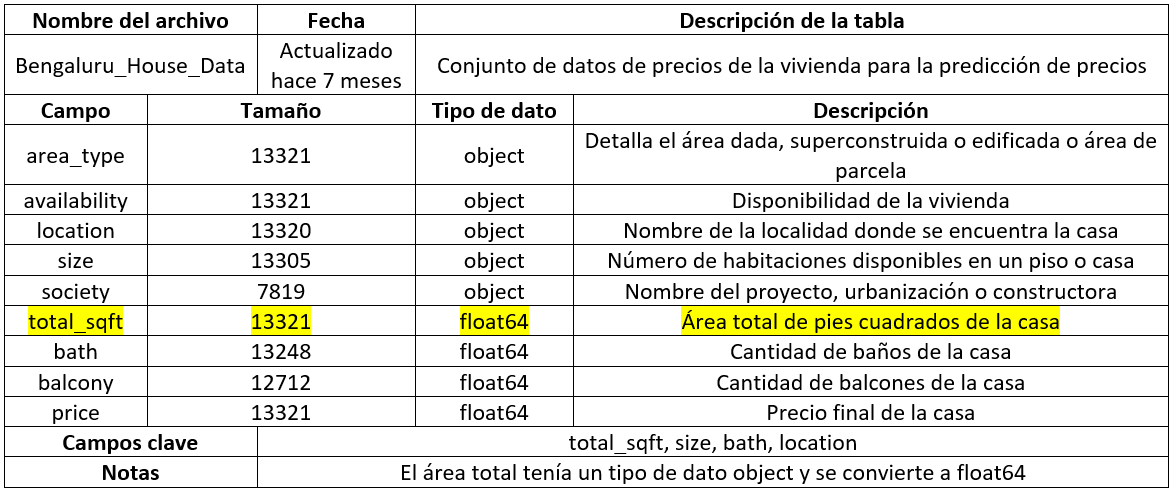

### **5. Dimensiones de calidad**

#### • **Completitud**

No todas las columnas tienen la información completa, solo 4 de ellas tienen todos los datos, sin embargo, no llegaría a ser un problema para la predicción ya que los atributos más importantes tienen sus datos casi completos. 

In [ ]:
print("DATOS NULOS")
print("Col -                Datos")
print(dataset_bereshit.isnull().sum())

**Datos después de haber rellenado todos los valores faltantes**

In [ ]:
print("DATOS NULOS")
print("Col -                Datos")
print(dataset.isnull().sum())

#### • **Conformidad**

Podemos observar que hay columnas con tipo «object» cuando debería ser un float (por ejemplo: 'tipo_area'). 


In [ ]:
dataset_bereshit.dtypes

Esto es porque hay filas que no tienen valor para esas columnas, en la sesión de arriba corregimos este error (por ejemplo: 'tipo_area' - [1056-1056]), se buscaron primero estos valores y se separaró la cadena para obtener los dos números, sacamos el promedio y se reemplazó en el nuevo 

In [ ]:
dataset.dtypes

La columna disponibiidad no tiene un formato estandar, aparecen datos con estos dos tipos de formato "Ready To Move" y una fecha "18-Jun", puede presentar problemas, pero solo se podría aplicar un filtro que separe cada formato. 

In [ ]:
print(dataset['disponibilidad'])

La columna "num_habitaciones" contiene dos formatos, por lo que puede generar problemas a la hora de interpretarlos, una solución para esto es extraer el número total de habitaciones:
- En el formato 3 BHK -  3
- En el formato  4 Bedroom -  4

Primero se deben rellenar los valores vaciós.

In [ ]:
print(dataset['num_habitaciones'])

- **Despues de rellenar todos los datos, se usa una función lamda para crear otra columna 'bhk' donde se eliminan las inconsistencias de las columnas de tamaño**

In [ ]:
dataset['bhk'] = dataset['num_habitaciones'].apply(lambda x: int(x.split(' ')[0]))
dataset = dataset.drop(['map', 'unidades'], axis=1)
dataset.head()

#### • **Consistencia**
Hay datos que no parecen consistentes, por ejemplo esta area total tiene una valor de 600 pies cuadrados y su precio es de 200, puede que no parezca un problema pues se muestra que hay 9 baños, sin embargo, no tiene sentido que una vivienda con tantos baños tenga un area total (en pies) tan pequeña.

In [ ]:
df5 = dataset[(dataset['area_total'] == 600) & (dataset['precio'] > 190)].head()
print(df5)

Otro ejemplo, puede ser esta casa con un area total de 60 pies cuadrados y un precio de 218, y otras casas muy pequeñas tienen valores elevados, se debe estudiar a fondo si el sector influye en este valor.

In [ ]:
df5 = dataset[(dataset['area_total'] < 600) & (dataset['precio'] > 190)].head()
print(df5)

Otro ejemplo, puede ser estas casas con un area total en pies cuadrados mayor a 20000 y un precios menosres a 180, el precio deberían ser mayor.

In [ ]:
df5 = dataset[(dataset['area_total'] > 20000) & (dataset['precio'] < 190)].head()
print(df5)

#### • **Precisión**
Hay muchos datos erroneos dentro de la tabla, por ejemplo en el area total se muestran algunos datos con valores atipicos, caso 1: (40 baños con un area total en pies cuadrados muy baja) o caso 2: (hay varias cosas con un area total en pies cuadrados muy elevada > 20000 y con un precio muy bajo).

In [ ]:
df6 = dataset[dataset['baños'] > 20].head()
print(df6)

In [ ]:
df6 = dataset[dataset['area_total'] > 20000].head()
print(df6)

#### • **Duplicidad**
Se encuentra que hay 529 datos que tienen ciertos atributos en común, o duplicados, sin embargo, esto no podría llegar a ser un problema, puede haber viviendas con las mismas características (apartamentos iguales en la misma urbanización, o en lugares diferentes) y como no hay un registro único que identifique cada vivienda, entonces, no son datos que generen conflictos porque pueden ser viviendas completamente diferentes.


In [ ]:
#Encontrar registros duplicados
duplicados = [dataset.duplicated()]
freq = [dataset.duplicated().value_counts()]
print(freq)

#### • **Integridad**
No hay problemas de integredad en los datos. 

# b. Otros ejercicios de analítica de datos (50%):

## Punto 1: Bonificación 

- Realice y entregue resuelto el ejercicio de clase sugerido pendiente correspondiente a la clase donde vimos el tema “Introducción a Pandas” y se dejó una tarea sugerida de 5 puntos de manejo de Pandas.

In [1]:
import pandas as pd

data = pd.read_csv('data/CountyHealthData_2014-2015.csv')
data.head()

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2014,NaN,0.122,...,NaN,0.374,0.250,3791.0,0.185,216.0,69192,0.127,NaN,0.287
1,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2015,NaN,0.122,...,NaN,0.314,0.176,4837.0,0.185,254.0,74088,0.133,NaN,NaN
2,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2014,6827.0,0.125,...,15.37,0.218,0.096,6588.0,0.119,135.0,71094,0.319,6.29,0.160
3,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2015,6856.0,0.125,...,17.08,0.227,0.123,6582.0,0.119,148.0,76362,0.334,5.60,NaN
4,AK,West,Pacific,Bethel Census Area,2050,2050,Insuff Data,1/1/2014,13345.0,0.211,...,NaN,0.394,0.124,5860.0,0.200,169.0,41722,0.668,12.77,0.477


In [ ]:
data.columns.values

#### 1. What are the 5 states with the highest average adult smoking rates? Show the states and their smoking rates.

In [3]:
smoking = data.groupby("State").max()["Adult smoking"]
smoking = smoking.sort_values(ascending = False).round(3)
smoking.head()

State
TN    0.511
TX    0.492
AK    0.482
MO    0.471
WV    0.462
Name: Adult smoking, dtype: float64

#### 2. Can you find all the counties with FEI values of 9 or higher?

In [5]:
FEI = data[data["Food environment index"] >= 9]
FEI.head()

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
510,CO,West,Mountain,Douglas County,8035,8035,Region 21,1/1/2014,3622.0,0.067,...,6.35,0.093,0.047,9341.0,0.086,41.0,98426,0.082,1.25,0.121
597,CT,Northeast,New England,Litchfield County,9005,9005,Region 12,1/1/2014,5191.0,0.092,...,11.15,0.104,0.029,8606.0,0.090,43.0,67746,0.151,1.43,0.192
864,GA,South,South Atlantic,Forsyth County,13117,13117,Region 24,1/1/2014,4052.0,0.066,...,7.74,0.190,0.085,10642.0,0.095,29.0,87380,0.161,1.38,0.153
865,GA,South,South Atlantic,Forsyth County,13117,13117,Region 24,1/1/2015,4234.0,0.066,...,9.51,0.178,0.076,10124.0,0.095,31.0,87565,0.157,1.60,NaN
892,GA,South,South Atlantic,Harris County,13145,13145,Region 24,1/1/2014,8440.0,0.129,...,7.17,0.168,0.094,8858.0,0.115,3.0,63806,0.286,4.78,0.148


#### 3. In many counties one can find more primary care physicians than dentists. However, in a few counties there are more than 5 times as many dentists as there are primary care physicians.

##### • Which counties are these?

In [42]:
FF = data[(data["Dentists"] < (data["Dentists"])*5) & (data["Primary care physicians"]  > (data["Dentists"])*5)]
FF_COPY =F.copy()
FF_COPY  = FF["County"] + " "+ FF["State"]  + " "+ str(FF["Primary care physicians"])
FF_COPY.head()

10     Haines Borough AK 10      39.0\n11      39.0\n...
11     Haines Borough AK 10      39.0\n11      39.0\n...
854    Emanuel County GA 10      39.0\n11      39.0\n...
855    Emanuel County GA 10      39.0\n11      39.0\n...
980    Pulaski County GA 10      39.0\n11      39.0\n...
dtype: object

#### Aquí podemos apreciar los condado que tienen 5 veces más médicos de atención primaria que dentistas.
- Haines Borough AK
- Emanuel County GA
- Pulaski County GA

##### •	Which of these counties has the most dentists?

In [6]:
dentis = data.groupby("State").max()["Dentists"]
dentis = dentis.sort_values(ascending = False).round(2)
dentis.head()

State
GA    358.0
VA    286.0
SD    214.0
IA    203.0
NE    197.0
Name: Dentists, dtype: float64

- Aquí podemos apreciar los 5 estados con más número de dentistas.

##### •	Which of these has the most dentists per capita? 

In [44]:
denstis_capita = pd.DataFrame()
denstis_capita['State'] = data['State']
denstis_capita['County'] = data['County']
denstis_capita['Dentists per capita'] = data['Dentists']/data['2011 population estimate']
denstis_capita.head().sort_values(by='Dentists per capita', ascending=False)

,State,County,Dentists per capita
1,AK,Aleutians West Census Area,0.013246
0,AK,Aleutians West Census Area,0.009014
4,AK,Bethel Census Area,0.006818
3,AK,Anchorage Borough,0.000346
2,AK,Anchorage Borough,0.000332


#### 4. Create a dataframe that only includes counties in the state of North Carolina. 

##### •  Sort your new dataframe by "Adult obesity." Use .loc to display the County name, "State," "Adult obesity," and "Physical inactivity" for each county. Do you notice any patterns? How do "Physical inactivity" values change as "Adult obesity" values go up 


In [46]:
Obesity = pd.DataFrame()
filtro = data[(data["State"] == "NC")]
Obesity['State'] = (filtro["State"])
Obesity['County'] = (filtro["County"])
Obesity['Adult obesity'] = filtro['Adult obesity'] 
Obesity['Physical inactivity'] = filtro["Physical inactivity"] 
Obesity.head()

,State,County,Adult obesity,Physical inactivity
3243,NC,Alamance County,0.341,0.273
3244,NC,Alamance County,0.332,0.257
3245,NC,Alexander County,0.272,0.233
3246,NC,Alexander County,0.283,0.234
3247,NC,Alleghany County,0.247,0.314


In [48]:
Obesity.loc[3243]

State                               NC
County                 Alamance County
Adult obesity                    0.341
Physical inactivity              0.273
Name: 3243, dtype: object

#### Adult obesity y Physical inactivity Son directamente proporcionales

##### •	Use matplotlib to visualize this relationship (adult obesity vs physical inactivity). Does your plot look the way you expected it to? 

Text(0, 0.5, 'Physical inactivity')

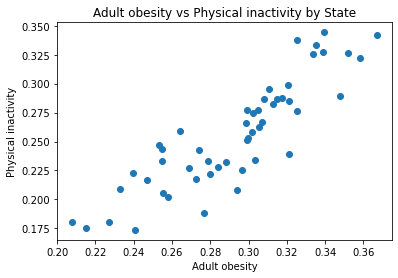

In [50]:
import matplotlib.pyplot as plt

obesity = data.groupby(["State"]).mean().reset_index()

obesity = obesity[["Adult obesity","Physical inactivity"]]

plt.scatter(x = obesity["Adult obesity"],
            y = obesity["Physical inactivity"])

plt.title("Adult obesity vs Physical inactivity by State")
plt.xlabel("Adult obesity")
plt.ylabel("Physical inactivity")

- Mientras mayor es la inactividad fisica de una persona tiende a ser mas obesa, podemos apreciar en la gráfica que se incrementa el valor de la columna "Adult obesity" a medida que "Physical inactivity" sube.

#### 5. The "Some college" column denotes the percantage of the population that have taken any number of college classes.

##### • What is the "Some college" value for Orange County, North Carolina in 2015? 

In [51]:
new = pd.DataFrame()
filter_college = data[(data["State"] == "NC") & (data["County"] == "Orange County")]
new['State'] = (filter_college["State"])
new['County'] = (filter_college["County"])
new['Year'] = (filter_college["Year"])
new['Some college'] = filter_college['Some college'] 
new

,State,County,Year,Some college
3377,NC,Orange County,1/1/2014,0.775
3378,NC,Orange County,1/1/2015,0.789


In [52]:
diem = new[(new["Year"] == "1/1/2015")]
diem.head()

,State,County,Year,Some college
3378,NC,Orange County,1/1/2015,0.789


##### • How does it compare to the "Some college" value for Orange County, California?

- El porcentaje de la población que ha tomado cualquier número de clases universitarias en 2015 se mantuvo casi igual al año 2014, solo 0.014

##### • How do the values for these two counties compare to the national average "Some college" value?  

In [54]:
data['Some college'].describe()

count    6109.000000
mean        0.552274
std         0.115284
min         0.188000
25%         0.472000
50%         0.552000
75%         0.634000
max         0.883000
Name: Some college, dtype: float64

#### Como podemos observar el valor promedio a nivel nacional "Some college" es de  0.55 y el valor que nos muestra para este condado es de 0.789, por lo tanto, es mayor al valor promedio nacional, este condado con respecto a otros , presenta un mayor porcentaje de la población que ha tomado cualquier número de clases universitarias.

## Punto 2: RANSAC Regressor

- Investigue cómo funciona el método de regresión lineal robusta llamado “RANSAC Regressor”. Luego, a través de simulación, genere una población de valores correspondientes a una regresión lineal simple con ruido (una entrada y una salida). 
- Añada una pequeña cantidad de valores extremos atípicos a la población. Compare visualmente el rendimiento de la regresión lineal clásica y del RANSAC Regressor al momento de ajustarse a los datos de la población.

Random sample consensus (RANSAC) es una heurística (algoritmo iterativo) para calcular los parámetros de un modelo de regresión lineal sobre un conjunto de datos observados que contiene valores atípicos. Es no determinista en el sentido de que produce un resultado razonable solo con una cierta probabilidad, mayor a medida que se permita que el algoritmo explore un mayor número de iteraciones. El algoritmo fue publicado por primera vez por Fischler y Bolles SRI International en 1981.

El supuesto es que los datos consisten en “inliers”, es decir, datos cuya distribución se explica por un conjunto de parámetros del modelo, aunque, como es usual en detección de anomalías, pueden estar sujetos a ruido, y “valores atípicos”.

RANSAC asume que, dado un conjunto de inliers, generalmente pequeño, existe un procedimiento que permite estimar los parámetros del modelo.

Una ventaja de RANSAC es su capacidad para hacer una estimación robusta de los parámetros del modelo, es decir, estima el modelo a pesar de haber un número significativo de valores atípicos. Una desventaja de RANSAC es que no hay tiempo máximo para calcular los parámetros del modelo, excepto el agotamiento del número de iteraciones. El número de iteraciones puede limitar la solución a una no óptima, y puede encontrar una solución que no se ajuste a los datos.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Librería de scikit_learn para regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from random import seed

np.random.seed(158)
#Generamos datos aleatorios
x1 = np.random.randint(50, 100, 85)
#Le ingresamos ruido
ruido = np.random.normal(0, 20, 85)
y1 = 2 + 3 * x1 + ruido
#x = np.append(x1,1)
#y = np.append(y1,1)

lw = 2
plt.scatter(x1, y1, color='yellowgreen', marker='.',
            label='Tendencia principal')
plt.legend(loc='upper left', fontsize='x-small')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# Se requiere que el arreglo este en forma de columna
x1 = x.reshape(-1,1)
y1 = y.reshape(-1,1)
lr = LinearRegression()
lr.fit(x1, y1)
# Muestre el intercepto y el coeficiente
lr.intercept_, lr.coef_
ransac = RANSACRegressor(LinearRegression())
ransac.fit(x1, y1)
# El objeto guarda los inliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
# Variables que se pueden usar luego si se desea
outliers_x = x1[outlier_mask]
outliers_y = y1[outlier_mask]
line_x = np.arange(x1.min(), x1.max())[:, np.newaxis]
line_y = lr.predict(line_x)
line_y_ransac = ransac.predict(line_x)
# Muestre el intercepto y el coeficiente
ransac.estimator_.intercept_, ransac.estimator_.coef_
lw = 2
plt.scatter(x1[inlier_mask], y1[inlier_mask], color='yellowgreen', marker='.',
            label='Tendencia principal')
plt.plot(line_x, line_y, color='navy', linewidth=lw, label='Regresor lineal')
plt.plot(line_x, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='Regresor Ransac')
plt.legend(loc='upper left', fontsize='xx-small')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Punto 3: PowerBI Desktop
- Descargue e instale la versión gratuita de PowerBI llamada “PowerBI Desktop”. Utilícela para crear un tablero de control que muestre los principales KPI del conjunto de datos de la asignación de vacunas a los departamentos que se encuentra en la siguiente ruta: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Asignaci-n-de-dosis-de-vacuna-contra-COVID-19/sdvb-4x4j
- El tablero debe responder preguntas relacionadas con la distribución de vacunas por departamento, su variación a través del tiempo, el uso destinado para la vacuna (grupo al que está destinada, número de dosis, etc.), el laboratorio que produjo la vacuna, entre otros.

#### El archivo [punctum_tribus.pbix] corresponde a este punto.

## Punto 4: National Parks

- Construya un programa que extraiga y analice de forma automática la información de “National Parks” de la siguiente página https://www.bl.uk/collection-metadata/downloads# . El objetivo del programa es que les permita a sus usuarios responder la siguiente pregunta: ¿Cuáles son las temáticas (topics) más populares de cada país?
- El programa debe conectarse directamente desde código a la página, descargar el zip, descomprimirlo y cargar el csv a pandas para responder la pregunta (no es válido que usted descargue y descomprima el archivo; esto debe hacerlo Python).

Instalamos el modulo wget

In [ ]:
pip install wget

#### Se mostrarán los 50 Topics más famosos con sus respectivos paises

In [57]:
import pandas as pd
import zipfile
import wget

def donwload():
    url = 'https://www.bl.uk/bibliographic/downloads/NationalParksResearcherFormat_202112_csv.zip'
    wget.download(url, 'C:/Users/jario/Documents/UDEM/Data_analisys/Tasks/Opus_iose/data/NationalParks.zip')

def decompress():
    zipfilename = "data/NationalParks.zip"
    password = None

    #aperire et eliciunt omnia files in ZIP
    z = zipfile.ZipFile(zipfilename, "r")
    try:
        z.extractall('data/National_Parks')
        print('\n File is unzipped in data/NationalParks folder')
    except:
        print('Error')
        pass
    z.close()
    
def main():
    
    #donwload()
    #decompress()
    
    # ------  aperi file ---------
    data_topics = pd.read_csv('data/National_Parks/topics.csv')

    #Extraemos el pais para llenar los NAN - muchos nombres contienen su ciudad de publicación 
    country = data_topics['Country of publication'].unique()
    country_new = []

    for i in range(len(data_topics)):
        
        if 'Wales' in data_topics['Topic']:
            country_new.append('Wales')
    
        elif 'United Kingdom Miscellaneous Islands' in data_topics['Topic']:
            country_new.append('United Kingdom Miscellaneous Islands')
    
        elif 'England' in data_topics['Topic']:
            country_new.append('England')
        
        elif 'Scotland' in data_topics['Topic']:
            country_new.append('Scotland')
        
        elif 'United Kingdom' in data_topics['Topic']:
            country_new.append('United Kingdom')
        
        elif 'Switzerland' in data_topics['Topic']:
            country_new.append('Switzerland')
    
        elif 'Singapore' in data_topics['Topic']:
            country_new.append('Singapore')
    
        elif 'Brazil' in data_topics['Topic']:
            country_new.append('Brazil')
        
        elif 'Germany' in data_topics['Topic']:
            country_new.append('Germany')

        elif 'France' in data_topics['Topic']:
            country_new.append('France')

    #j = (len(data_topics))
    # ------  topics -------------
    dups_topics = pd.pivot_table(data_topics,columns=['Topic','Country of publication'], aggfunc='size').sort_values(ascending = False)
    dups_topics = pd.pivot_table(data_topics,columns=['Topic'], aggfunc='size').sort_values(ascending = False)
    columns_name = dups_topics.index[0:100]
    columns_points = []
    columns_country = []
    #column_name = columns_name[1]
    index_logos = []

    for i in range(100):
        columns_points.append(dups_topics[i])
        columns_country.append(data_topics.loc[i,"Country of publication"])
        index_logos.append(i)

    #print(columns_points)
    #name = columns_name[0]
    #topics['Country of publication'] = 
    #filter = data_topics[data_topics["Topic"] == name]
    #data_topics.loc[10,"Country of publication"]
    topics = pd.DataFrame()
    topics['Name'] = columns_name
    topics['Points'] = columns_points
    topics['Country'] = columns_country
    #topics.head(100)

    countrys = topics['Country'].unique()
    verbum = len(country)

    final = pd.DataFrame(index= index_logos)
    for i in range(len(countrys)):
        name = countrys[i]
        final[name] = countrys[i]

    filter_wales = topics[(topics["Country"] == "Wales")]
    filter_uk = topics[(topics["Country"] == "United Kingdom Miscellaneous Islands")]
    filter_en = topics[(topics["Country"] == "England")]
    filter_scot = topics[(topics["Country"] == "Scotland")]
    filter_nan = topics[(topics["Country"].isna())]

    final['Wales'] = filter_wales.Name
    final['United Kingdom Miscellaneous Islands'] = filter_uk.Name
    final['England'] = filter_en.Name
    final['Scotland'] = filter_scot.Name
    final['NaN'] = filter_nan.Name

    #final['Name'] = columns_name
    #final.head()
    #final.head(100)

    print("----------------------------------------------------------------------------------")
    print("las temáticas (topics) más populares de Wales: ")
    print(filter_wales.Name)
    print("----------------------------------------------------------------------------------")
    print("\n Las temáticas (topics) más populares de United Kingdom Miscellaneous Islands: ")
    print(filter_uk.Name)
    print("----------------------------------------------------------------------------------")
    print("\n las temáticas (topics) más populares de England: ")
    print(filter_en.Name)
    print("----------------------------------------------------------------------------------")
    print("\n las temáticas (topics) más populares de Scotland: ")
    print(filter_scot.Name)
    print("----------------------------------------------------------------------------------")
    print("\n las temáticas (topics) más populares de paises sin nombre: ")
    print(filter_nan.Name)
    print("----------------------------------------------------------------------------------")

main()

----------------------------------------------------------------------------------
las temáticas (topics) más populares de Wales: 
0      Brecon Beacons National Park (Wales)--Guidebooks
2                                     Regional planning
3     Walking--Wales--Brecon Beacons National Park--...
5     Yorkshire Dales National Park (England)--Guide...
6                     Broads, The (England)--Guidebooks
30                          Peak District National Park
32    Peak District National Park (England)--Guide-b...
33                    Pembrokeshire (Wales)--Guidebooks
34                        Aquatints--England--1790-1800
37    Lake District National Park (England)--Guidebooks
38    Brecon Beacons National Park (Wales)--Descript...
39                                    Cumbria (England)
40    North Yorkshire--National parks--Yorkshire Dal...
67                                              Walking
68    South Wales--National parks--Brecon Beacons Na...
84                Yorkshire D

## Punto 5: Láminas - Experimento
- Usted compró recientemente el álbum de láminas para el mundial. Suponga que el álbum tiene 300 láminas y que la probabilidad de sacar cualquier lámina es uniforme (es decir, todas las láminas tienen la misma probabilidad de salir).
- Usando Python, cree un código que de forma aleatoria empiece a sacar una por una las láminas hasta que “llene” completamente el álbum, registrando cuántas láminas tuvo que sacar en total. En Python, repita el experimento anterior unas 10000 veces, y registre en cada experimento el número de láminas que tuvo que sacar para poder llenar el álbum y grafique este valor en un histograma. ¿Cuál es el número promedio de láminas que se necesitan?


In [ ]:
%matplotlib inline

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

experimenta = int(input("Intra numerum experimentorum: "))
experimenta_matrix = []
experimenta_nomen = []

for x in range(0,experimenta):
    
    globals()['experimentum%s' % x]  = 0
    globals()['matrix%s' % x] = []
    #i = len(matrix)
    folium = 0
    while folium <= 299:
        numerus = random.randint(1, 300)
        print('Numerus ' + str(numerus))
        
        if numerus not in globals()['matrix%s' % x]:
            globals()['matrix%s' % x].append(numerus)
            folium = folium + 1
            globals()['experimentum%s' % x] = globals()['experimentum%s' % x] + 1
            print("Folium est ingressus")
        
        elif numerus in globals()['matrix%s' % x]:
            folium = folium
            globals()['experimentum%s' % x] = globals()['experimentum%s' % x] + 1
            print("Non intravit, iam exstat")
    
    experimenta_matrix.append(globals()['experimentum%s' % x])
    experimenta_nomen.append('fact'+str(x))
    print("Experimentorum numero: " + str(x) + "Totalis numerus foliorum: " + str(globals()['experimentum%s' % x]) ) 
    print(globals()['matrix%s' % x])
    #print(experimenta_nomen)

In [ ]:
#------------- Graphics ---------------------------------
x_valorem = experimenta_nomen
y_valorem = experimenta_matrix
    
plt.bar(x_valorem, y_valorem) #Graphic
plt.title('Experimenta - Totalis numerus foliorum implere album ') #Titulus 
ax = plt.subplot() #Axis 
ax.set_xticks(x_valorem) #Axis x 
ax.set_xticklabels(x_valorem) #Label axis x
ax.set_ylabel('Totalis numerus foliorum') #Nomen axis Y
ax.set_xlabel('Experiementa numerus') #Nomen axis X 

In [ ]:
# ---------- Statistics Data ---------------------------
experimenta_h = pd.DataFrame()
experimenta_h['Experimenta'] = experimenta_nomen
experimenta_h['Totalis numerus foliorum'] = experimenta_matrix
experimentae = experimenta_h['Totalis numerus foliorum']
experimenta_h.set_index('Experimenta', inplace=True)

nomen = [i for i in range(len(experimenta_nomen))]

# Creating histogram
plt.bar(experimentae, height=nomen)
plt.xticks(experimentae, experimenta_nomen);
#experiementa_h.hist()

In [ ]:
experimenta_h.describe()

### Como podemos observar el número promedio de láminas que se requieren para llenar el album es de 2045 láminas.